In [47]:
import time
import matplotlib.pyplot as plt
import sys
import itertools

In [48]:
NO_PATH = sys.maxsize
graph = [
    [0,       7,       NO_PATH, 8       ],
    [NO_PATH, 0,       5,       NO_PATH ],
    [NO_PATH, NO_PATH, 0,       2       ],
    [NO_PATH, NO_PATH, NO_PATH, 0       ]
]
MAX_LENGTH = len(graph[0])

In [49]:
sample_a = [[0, 5, NO_PATH, 10],
            [NO_PATH, 0, 3, NO_PATH],
            [NO_PATH, NO_PATH, 0,   1],
            [NO_PATH, NO_PATH, NO_PATH, 0]]

sample_b = [[0, NO_PATH, 9, NO_PATH],
            [NO_PATH, 0, NO_PATH, NO_PATH],
            [NO_PATH, -5, 0, 8],
            [-3, 2, NO_PATH, 0]]



sample_d = [[0, 8, NO_PATH, NO_PATH, 5, 3, NO_PATH, NO_PATH],
            [NO_PATH, 0, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH],
            [7, 4, 0, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH],
            [NO_PATH, NO_PATH, NO_PATH, 0, 1, NO_PATH, NO_PATH, 2],
            [NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH, NO_PATH],
            [NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH],
            [NO_PATH, NO_PATH, NO_PATH, 3, NO_PATH, NO_PATH, 0, 12],
            [NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0]]

sample_e = [[0, 8, NO_PATH, NO_PATH, 5, 3, NO_PATH, NO_PATH, 5, 2, 8, 11, 23, 17, 1, 2],
            [NO_PATH, 0, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH, NO_PATH, 4, NO_PATH, 1, 4, 11, NO_PATH, 8],
            [7, 4, 0, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH, 5, 3, NO_PATH, NO_PATH, 5, 2, 8, 11],
            [4, 4, 8, 0, 1, NO_PATH, NO_PATH, 2, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 3],
            [4, 4, 8, NO_PATH, 0, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 4, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH],
            [4, 4, 8, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH, 7, 4, 9, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH],
            [4, 4, 8, 3, NO_PATH, 2, 0, 12, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 12],
            [4, 4, 8, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, 5, 2, 9, 22, 3, 7, 9, 1],
            [2, 8, 8, NO_PATH, 5, 3, NO_PATH, NO_PATH, 0, 2, 8, 11, 23, 17, 1, 2],
            [NO_PATH, 5, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH, NO_PATH, 0, NO_PATH, 1, 4, 11, NO_PATH, 8],
            [7, 4, 2, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH, 5, 3, 0, NO_PATH, 5, 2, 8, 11],
            [NO_PATH, 7, 4, NO_PATH, 1, 2, 9, 2, NO_PATH, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH, NO_PATH, 3],
            [NO_PATH, 7, 4, 11, 2, NO_PATH, NO_PATH, 3, 5, 4, NO_PATH, 11, 0, NO_PATH, 9, NO_PATH],
            [NO_PATH, 7, 4, NO_PATH, NO_PATH, 9, NO_PATH, NO_PATH, 7, 4, 9, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH],
            [NO_PATH, 7, 4, 3, NO_PATH, NO_PATH, 8, 12, NO_PATH, 6, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, 12],
            [NO_PATH, 7, 4, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 1, 5, 2, NO_PATH, 22, 3, 7, 9, 0]]


In [50]:
def floyd_iterative(distance):
    for intermediate, start_node, end_node in itertools.product(range(MAX_LENGTH), range(MAX_LENGTH), range(MAX_LENGTH)):
        if start_node == end_node:
            distance[start_node][end_node] = 0
            continue
        distance[start_node][end_node] = min(
            distance[start_node][end_node], distance[start_node][intermediate] + distance[intermediate][end_node])
    return distance

In [51]:
def shortest_path(start, end, intermediate, distance):
    if intermediate < 0:
        return distance[start][end]
    return min(
        shortest_path(start, end, intermediate - 1, distance),
        shortest_path(start, intermediate, intermediate - 1, distance) +
        shortest_path(intermediate, end, intermediate - 1, distance)
    )
def floyd_recursive(distance):
    for start_node, end_node in itertools.product(range(MAX_LENGTH), range(MAX_LENGTH)):
        if start_node == end_node:
            distance[start_node][end_node] = 0
            continue
        distance[start_node][end_node] = shortest_path(
            start_node, end_node, MAX_LENGTH - 1, distance)
    return distance

In [52]:
input_sizes = [sample_a, sample_b, sample_d, sample_e]
iterative_times = []
recursive_times = []

In [53]:
for n in input_sizes:
    start_time = time.perf_counter_ns()
    floyd_iterative(n)
    iterative_times.append(time.perf_counter_ns() - start_time)

    start_time = time.perf_counter_ns()
    floyd_recursive(n)
    recursive_times.append(time.perf_counter_ns() - start_time)


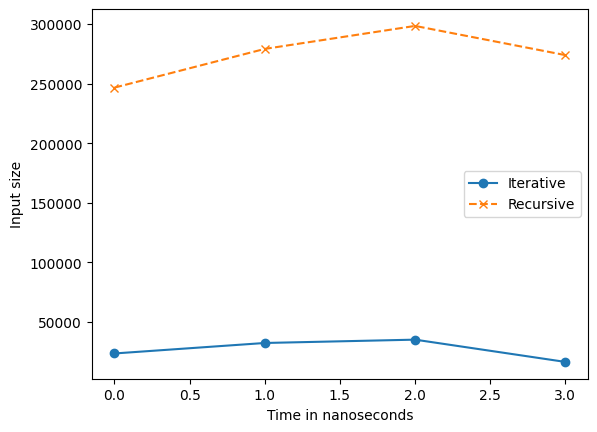

In [54]:
plt.plot(iterative_times, label='Iterative', marker='o', linestyle='-')

plt.plot(recursive_times, label='Recursive', marker='x', linestyle='--')

plt.xlabel('Time in nanoseconds')
plt.ylabel('Input size')
plt.legend()

plt.savefig('../assets/images/results.png')
plt.show()

